Note: you may need to restart the kernel to use updated packages.
Statistical Description of the Data Set:
        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                

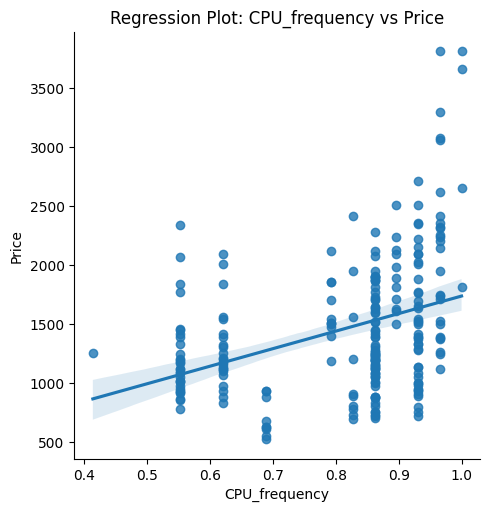

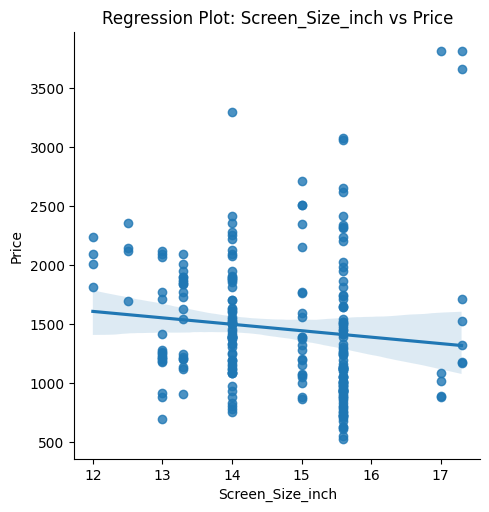

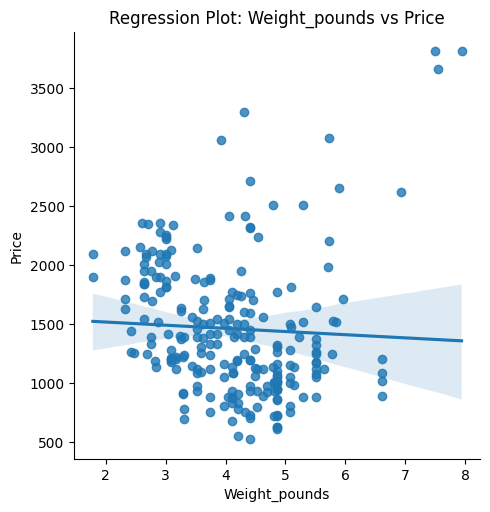

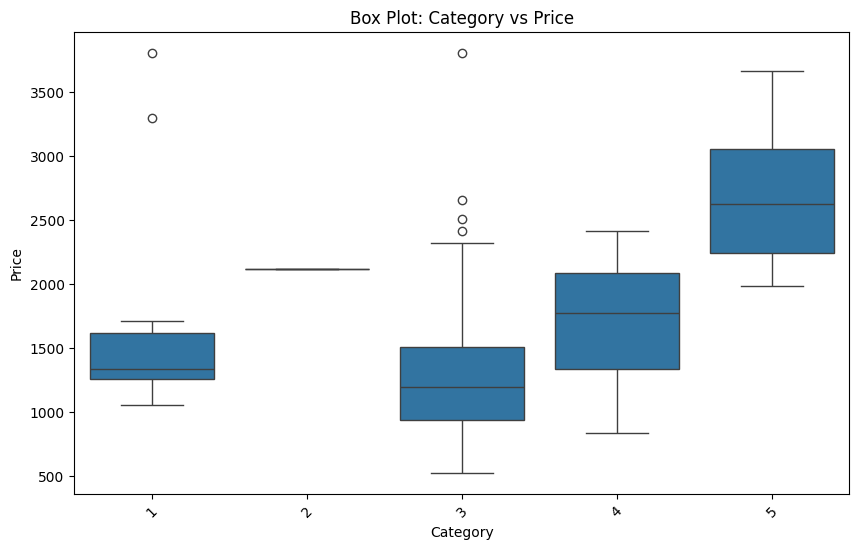

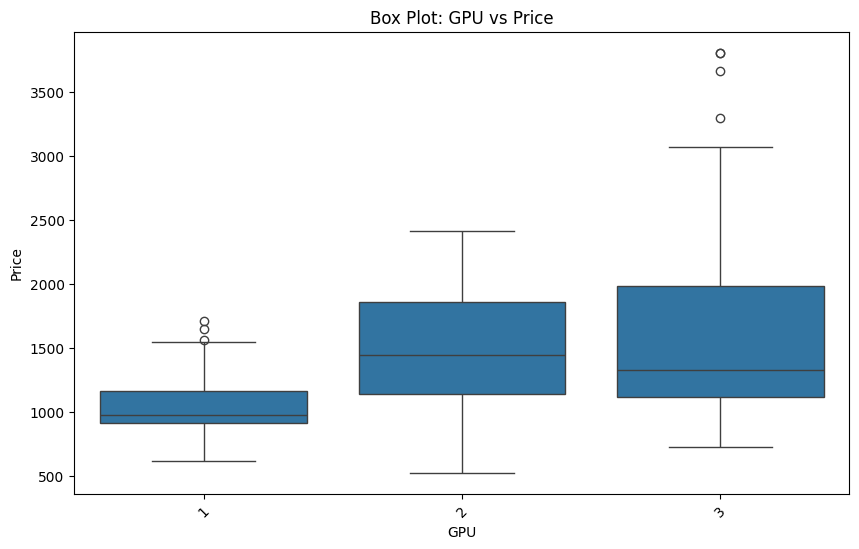

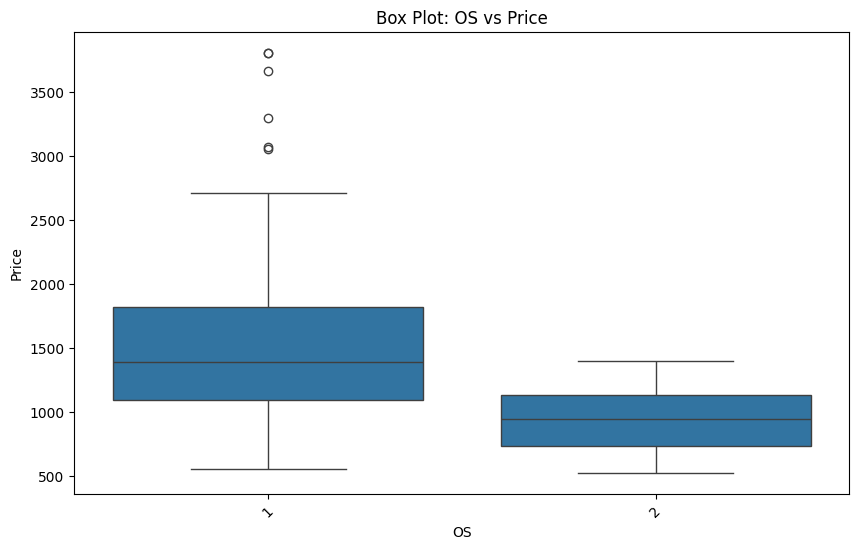

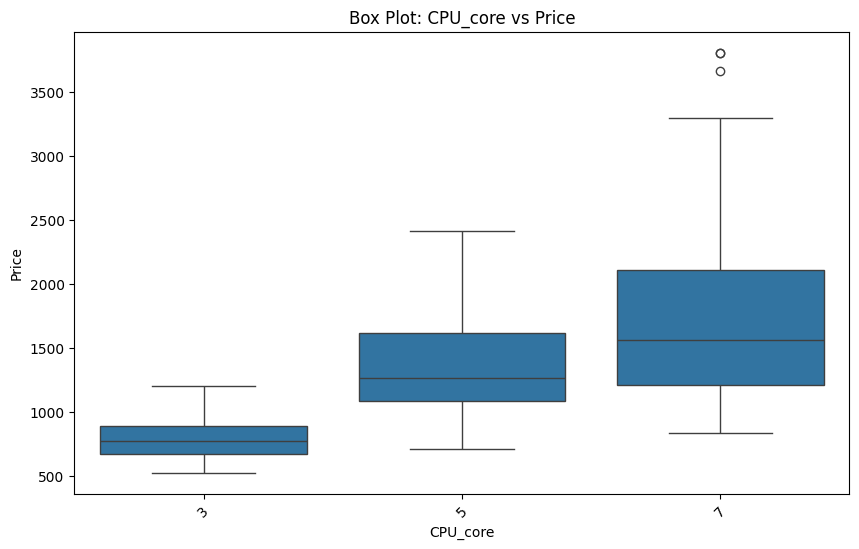

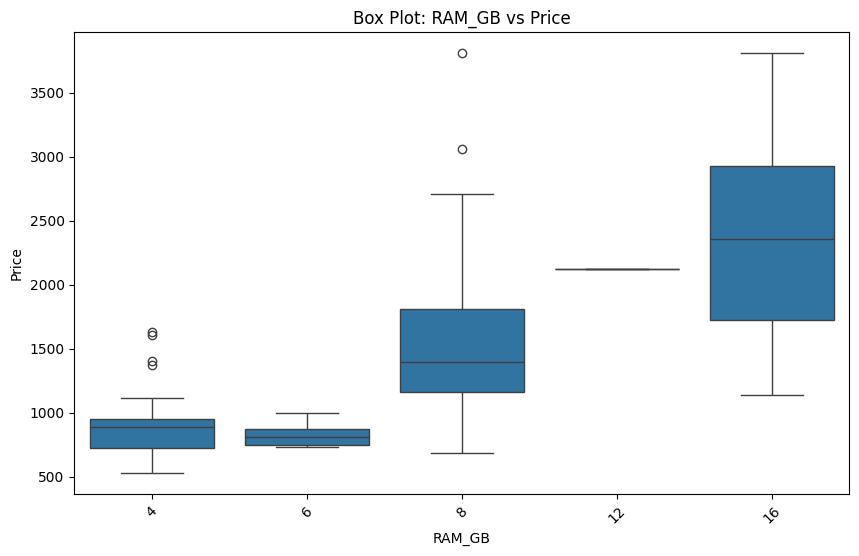

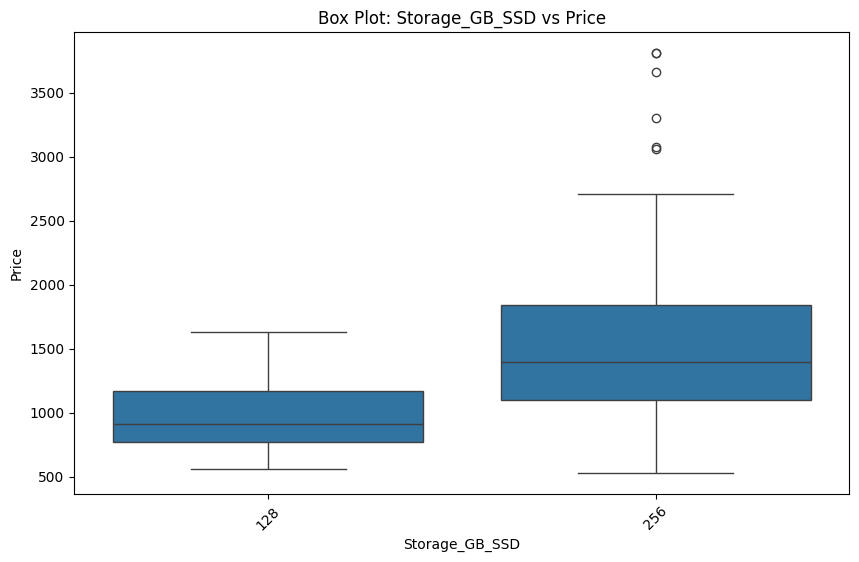


Correlation, Pearson Coefficient, and P-values:
           Attribute  Correlation  Pearson Coefficient       P-value
0       Unnamed: 0.1     0.321933             0.321933  3.851058e-07
1         Unnamed: 0     0.321933             0.321933  3.851058e-07
2           Category     0.286243             0.286243  7.225696e-06
3                GPU     0.288298             0.288298  6.166950e-06
4                 OS    -0.221730            -0.221730  5.696643e-04
5           CPU_core     0.459398             0.459398  7.912950e-14
6   Screen_Size_inch    -0.110644            -0.110644  8.853398e-02
7      CPU_frequency     0.366666             0.366666  5.502463e-09
8             RAM_GB     0.549297             0.549297  3.681561e-20
9     Storage_GB_SSD     0.243421             0.243421  1.489892e-04
10     Weight_pounds    -0.050312            -0.050312  4.397694e-01
11    Screen-Full_HD    -0.021075            -0.021075  7.463568e-01
12  Screen-IPS_panel     0.021075             0.021075

In [3]:
%pip install pandas matplotlib seaborn scipy

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Step 1: Import the data set from the CSV file

data = pd.read_csv("ml_training\\laptop_pricing_dataset_mod2.csv")

# Step 2: Generate the statistical description of all the feature
description = data.describe(include='all')
print("Statistical Description of the Data Set:")
print(description)

# Step 3: Create regression plots for specified attributes against "Price"
attributes = ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]
for attribute in attributes:
    sns.lmplot(x=attribute, y='Price', data=data)
    plt.title(f'Regression Plot: {attribute} vs Price')
    plt.show()

# Step 4: Create box plots for specified attributes against "Price"
box_plot_attributes = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
for attribute in box_plot_attributes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=attribute, y='Price', data=data)
    plt.title(f'Box Plot: {attribute} vs Price')
    plt.xticks(rotation=45)
    plt.show()

# Step 5: Evaluate correlation, Pearson coefficient, and p-values
numerical_attributes = data.select_dtypes(include=['float64', 'int64']).columns
correlation_data = []

for attribute in numerical_attributes:
    if attribute != 'Price':
        corr_value = data[attribute].corr(data['Price'])
        pearson_coef, p_value = pearsonr(data[attribute], data['Price'])
        correlation_data.append({
            'Attribute': attribute,
            'Correlation': corr_value,
            'Pearson Coefficient': pearson_coef,
            'P-value': p_value
        })

# Step 6 & 7: Create a DataFrame for correlation results and print it
correlation_df = pd.DataFrame(correlation_data)
print("\nCorrelation, Pearson Coefficient, and P-values:")
print(correlation_df)